In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=2)
from astropy.modeling import models, fitting
from __future__ import print_function

In [2]:
data = np.array([np.loadtxt('../data/post_stamp_profiles/candy_'+
                            str(i)+'_prof_i.dat', usecols=(0,1)) for i in range(2,6)])

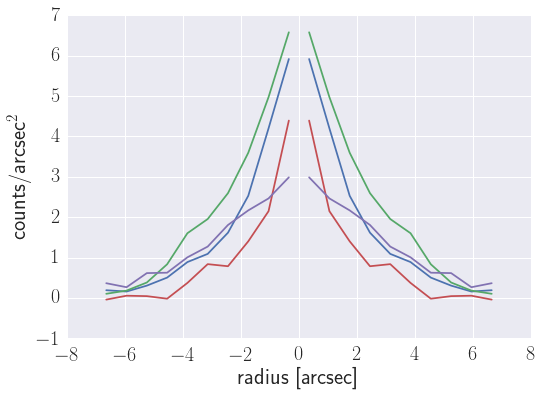

In [3]:
palette = seaborn.color_palette()
f1, a1 = plt.subplots()
for i in range(4):
    a1.plot(data[i,:,0], data[i,:,1], c=palette[i])
    a1.plot(-data[i,:,0], data[i,:,1], c=palette[i])
a1.set_xlabel('radius [arcsec]')
a1.set_ylabel(r'counts/arcsec$^2$');

In [4]:
fits = []
init_params = [(10., 0., 1.5), (6., 0., 1.5), (5., 0., 1.0), (2.8, 0.0, 4.0)]
for i in range(4):
    _a, _m, _s = init_params[i]
    g_init = models.Gaussian1D(amplitude=_a, mean=_m, stddev=_s)
    fit_g = fitting.LevMarLSQFitter()
    x = np.concatenate([-data[i,:,0], data[i,:,0]])
    y = np.concatenate([data[i,:,1], data[i,:,1]])
    fits.append(fit_g(g_init, x, y))

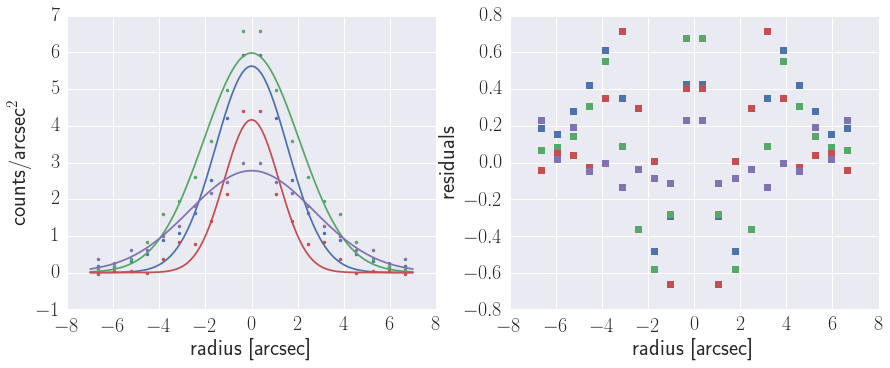

In [5]:
f2, a2 = plt.subplots(1,2,figsize=(14,5))
for i in range(4):
    x = np.concatenate([-data[i,:,0], data[i,:,0]])
    y = np.concatenate([data[i,:,1], data[i,:,1]])
    a2[0].plot(x, y, '.', c=palette[i])
    xfit = np.linspace(-7,7,101)
    a2[0].plot(xfit, fits[i](xfit), '-', c=palette[i])
    a2[1].plot(x, y - fits[i](x), 's', c=palette[i])
a2[0].set_xlabel('radius [arcsec]')
a2[0].set_ylabel(r'counts/arcsec$^2$')
a2[1].set_xlabel('radius [arcsec]')
a2[1].set_ylabel(r'residuals');

In [6]:
for i in range(4):
    print('candidate', i+2, 'fwhm =', round(2.355*fits[i].stddev.value, 3), 'arcsec')

candidate 2 fwhm = 3.683 arcsec
candidate 3 fwhm = 4.856 arcsec
candidate 4 fwhm = 2.786 arcsec
candidate 5 fwhm = 6.361 arcsec


In [7]:
imag = [21.10, 21.19, 22.35, 21.47]
for i in range(4):
    r = 2.355*fits[i].stddev.value/2.0
    print('SB ~', imag[i] + 2.5*np.log10(np.pi*r**2), 'mag/arcsec^2')

SB ~ 23.6687312144 mag/arcsec^2
SB ~ 24.3589152631 mag/arcsec^2
SB ~ 24.3125393326 mag/arcsec^2
SB ~ 25.2252166937 mag/arcsec^2
